<a href="https://colab.research.google.com/github/psykotic1/Heart-Disease-Detection/blob/main/Heart_Disease_Perdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


### Data Frame

In [13]:
data = pd.read_csv("/content/heart.csv")

In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data.shape

(303, 14)

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data Differentiation

In [20]:
  data["sex"].unique()

array([1, 0])

In [21]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
percentage_female = (countFemale / len(data.sex)) * 100
percentage_male = (countMale / len(data.sex)) * 100
print("Percentage of Female Patients:{:.2f}%".format(percentage_female))
print("Percentage of Male Patients:{:.2f}%".format(percentage_male))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


Bar Chart

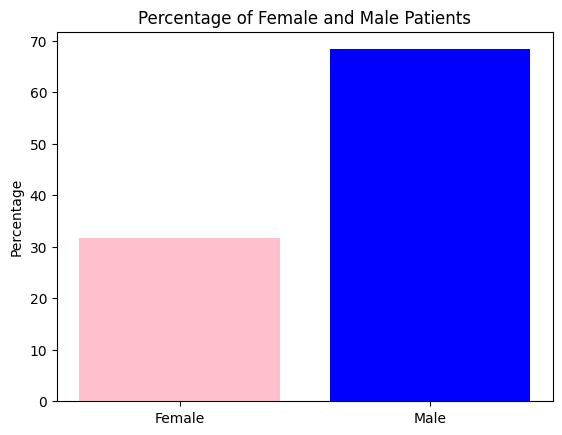

In [22]:
#Bar Chart
labels = ['Female', 'Male']
percentages = [percentage_female, percentage_male]
plt.bar(labels, percentages, color=['pink', 'blue'])
plt.title('Percentage of Female and Male Patients')
plt.ylabel('Percentage')
plt.show()

In [23]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [24]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

<Axes: xlabel='resting_blood_pressure', ylabel='target'>

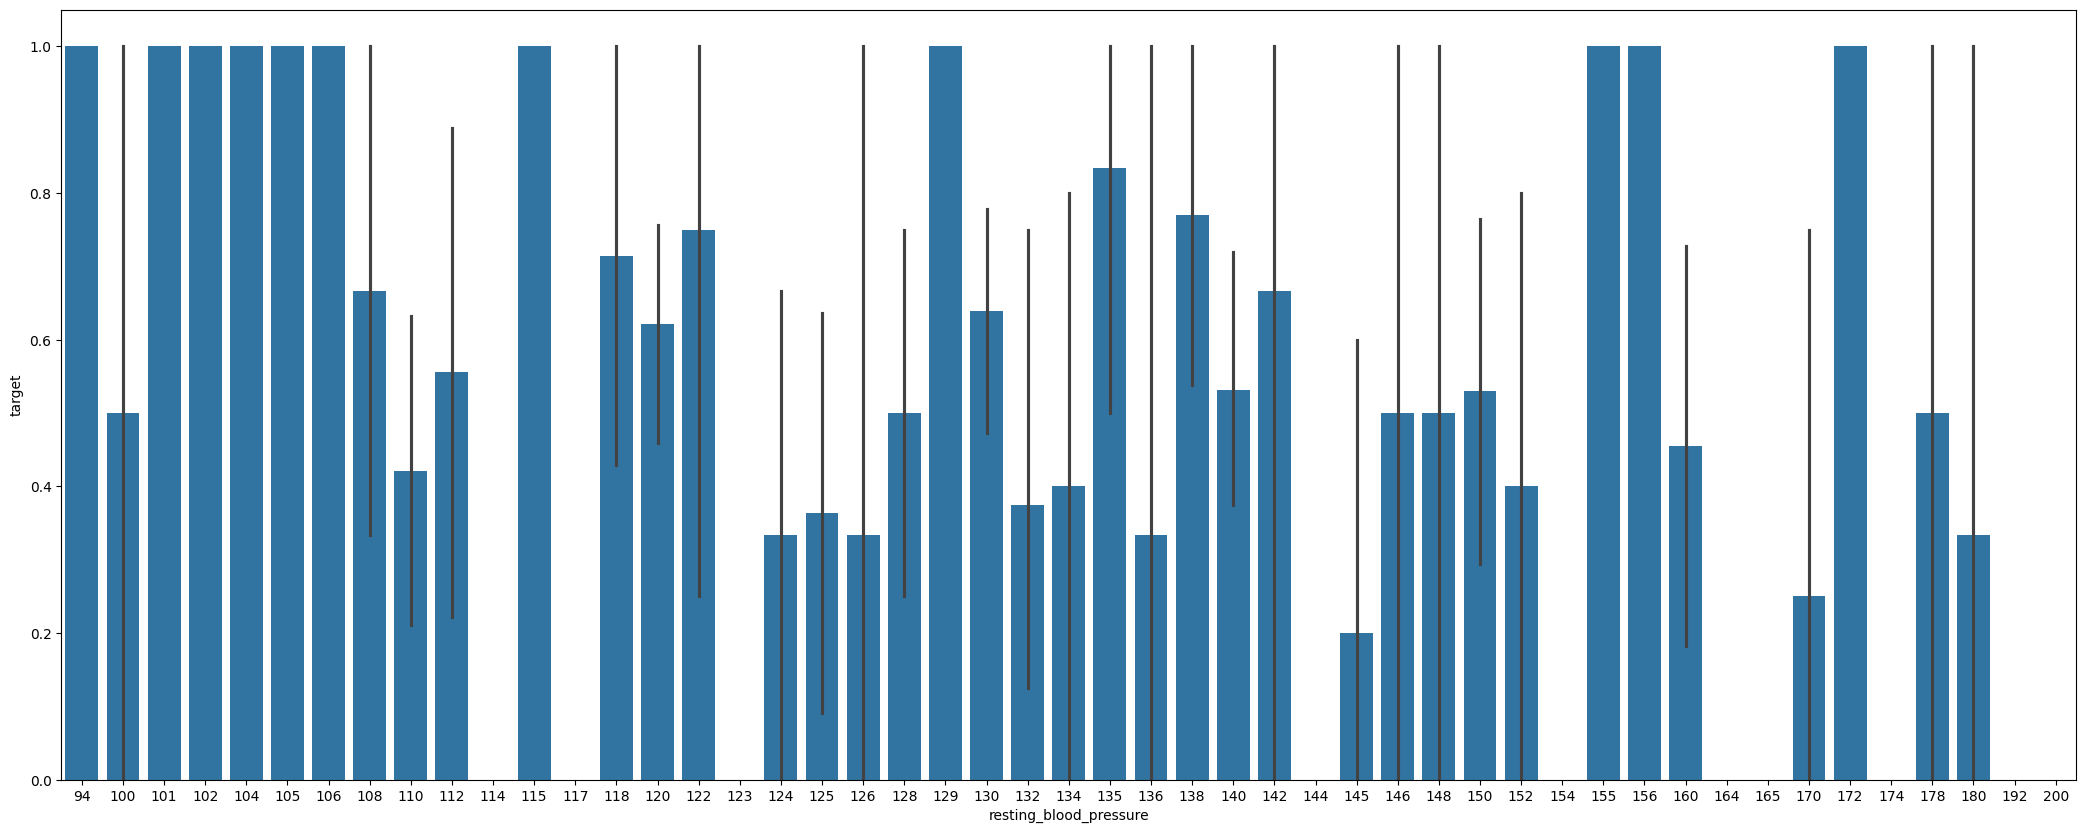

In [26]:
data["resting_blood_pressure"].unique()
plt.figure(figsize=(26, 10))
sns.barplot(x=data["resting_blood_pressure"],y=data["target"])

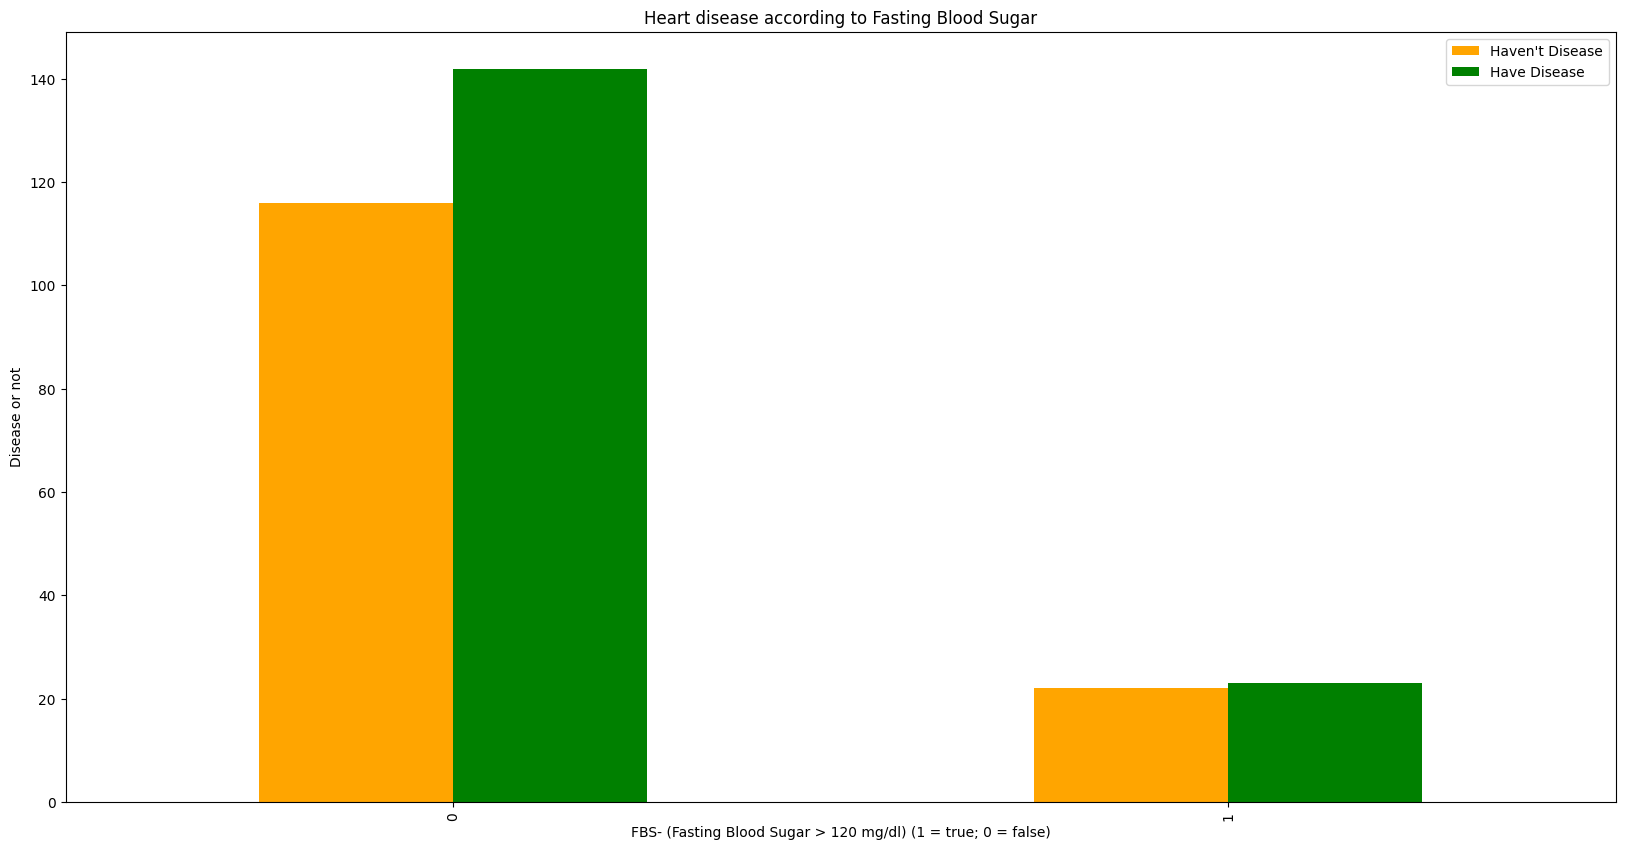

In [27]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['orange','green'])
plt.title("Heart disease according to Fasting Blood Sugar")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# TRAIN TEST SPLIT

In [28]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [29]:
X_train.shape

(242, 13)

In [30]:
X_test.shape

(61, 13)

In [31]:
Y_train.shape

(242,)

In [32]:
Y_test.shape

(61,)

## importing Accuracy score

In [34]:
from sklearn.metrics import accuracy_score

# Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [36]:
Y_pred_lr.shape

(61,)

In [37]:
Y_an = lr.predict([[44,1,1,130,219,0,0,188,0,0,2,0,2]])
print(Y_an)
Y_an = lr.predict([[65,0,0,150,225,0,0,114,0,1,1,3,3]])
print(Y_an)

[1]
[0]


In [38]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_random_state = 0

num_iterations = 200

for x in range(num_iterations):
    rf = RandomForestClassifier(random_state=x, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)

    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_random_state = x

# Create a new RandomForestClassifier with the best random state
best_rf = RandomForestClassifier(random_state=best_random_state, n_jobs=-1)
best_rf.fit(X_train, Y_train)
Y_pred_rf_best = best_rf.predict(X_test)

print("Maximum Accuracy:", max_accuracy)

Maximum Accuracy: 88.52


In [40]:
Y_pred_rf.shape

(61,)

In [41]:

Y_an = best_rf.predict([[44, 1, 1, 130, 219, 0, 0, 188, 0, 0, 2, 0, 2]])
print(Y_an)
Y_an = best_rf.predict([[65, 0, 0, 150, 225, 0, 0, 114, 0, 1, 1, 3, 3]])
print(Y_an)

[1]
[0]


In [42]:

score_rf = round(accuracy_score(Y_pred_rf_best, Y_test) * 100, 2)
print("The accuracy score achieved using RandomForest is:", str(score_rf) + " %")

The accuracy score achieved using RandomForest is: 88.52 %


# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [44]:
Y_pred_nb.shape

(61,)

In [45]:
Y_an = nb.predict([[44,1,1,130,219,0,0,188,0,0,2,0,2]])
print(Y_an)
Y_an = nb.predict([[65,0,0,150,225,0,0,114,0,1,1,3,3]])
print(Y_an)

[1]
[0]


In [46]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


# FINAL SCORE

In [47]:
scores = [score_lr,score_nb,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Random Forest is: 88.52 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

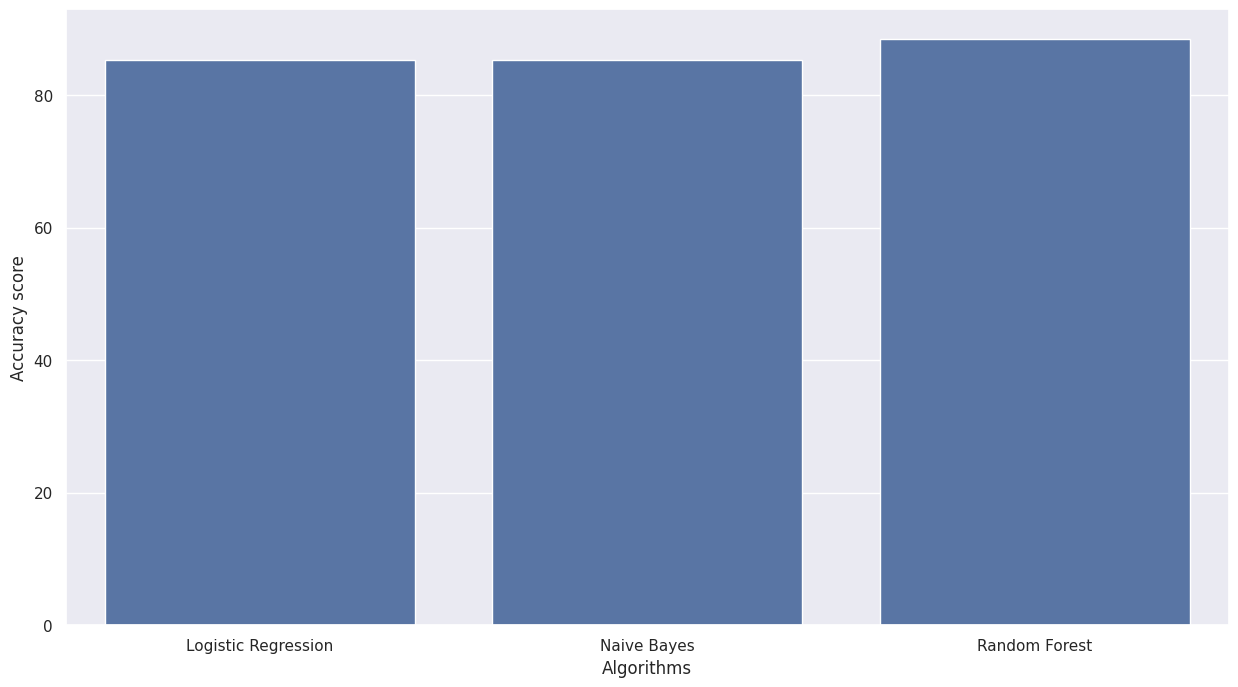

In [48]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)